**PREDICTING GAS PRICE WITH TIME SERIES ANALYSIS**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA

C:\Users\GLORY COMPUTERS\AppData\Local\Temp\ipykernel_12968\2507941711.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'])


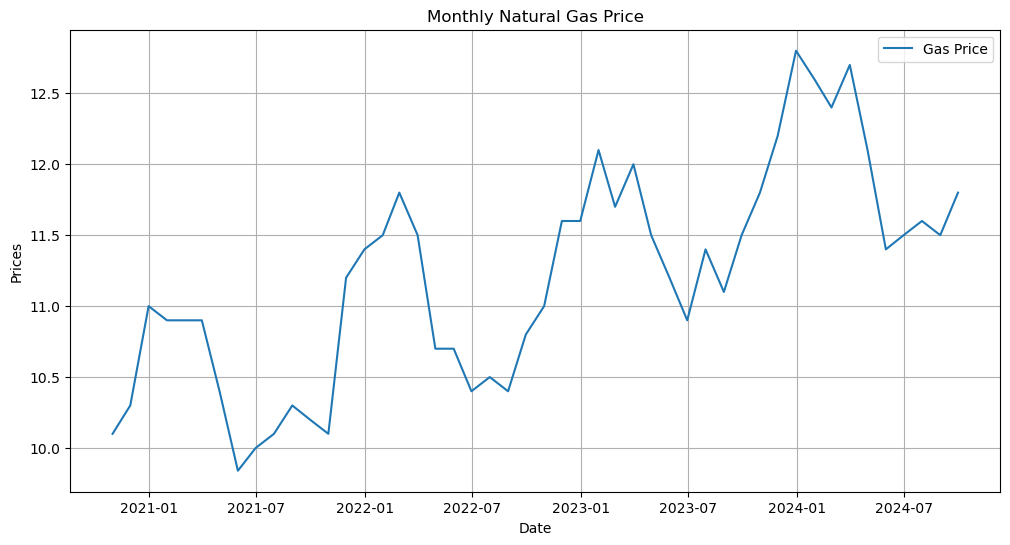

In [3]:
data = pd.read_csv(r'C:\Users\GLORY COMPUTERS\Downloads\gasprices.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data.sort_index(inplace=True)
plt.figure(figsize=(12, 6))
plt.plot(data['Prices'], label='Gas Price')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.title('Monthly Natural Gas Price')
plt.legend()
plt.grid(True)
plt.show()

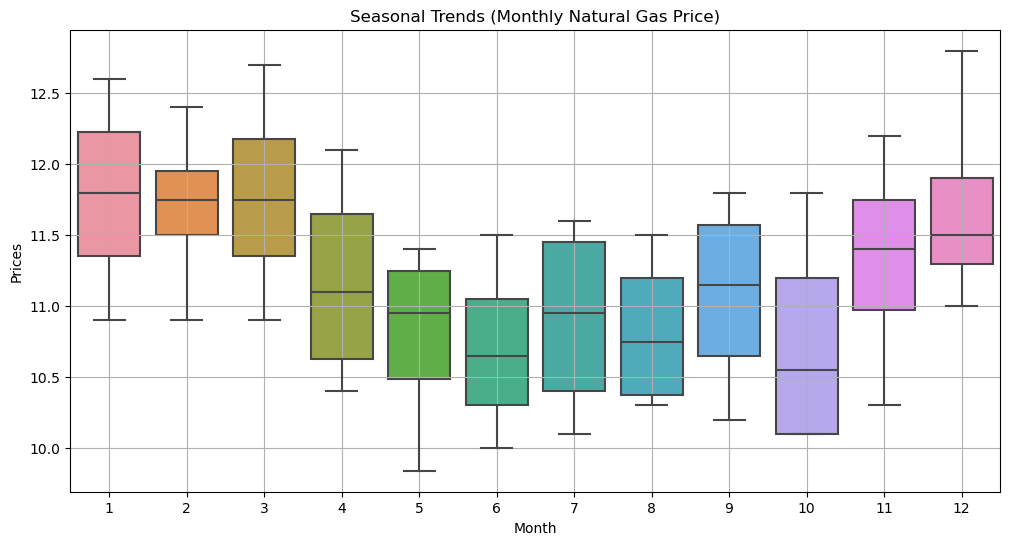

In [4]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=data.index.month, y=data['Prices'])
plt.xlabel('Month')
plt.ylabel('Prices')
plt.title('Seasonal Trends (Monthly Natural Gas Price)')
plt.grid(True)
plt.show()

In [5]:
def estimate_gas_price(input_date):
    # Fit the ARIMA model
    model = ARIMA(data['Prices'].values, order=(2, 1, 2))
    model_fit = model.fit()


    future_date = input_date + pd.DateOffset(years=1)
    future_price = model_fit.forecast(steps=12)[0]

    estimated_price = model_fit.forecast(steps=1)[0]

    return estimated_price, future_date, future_price

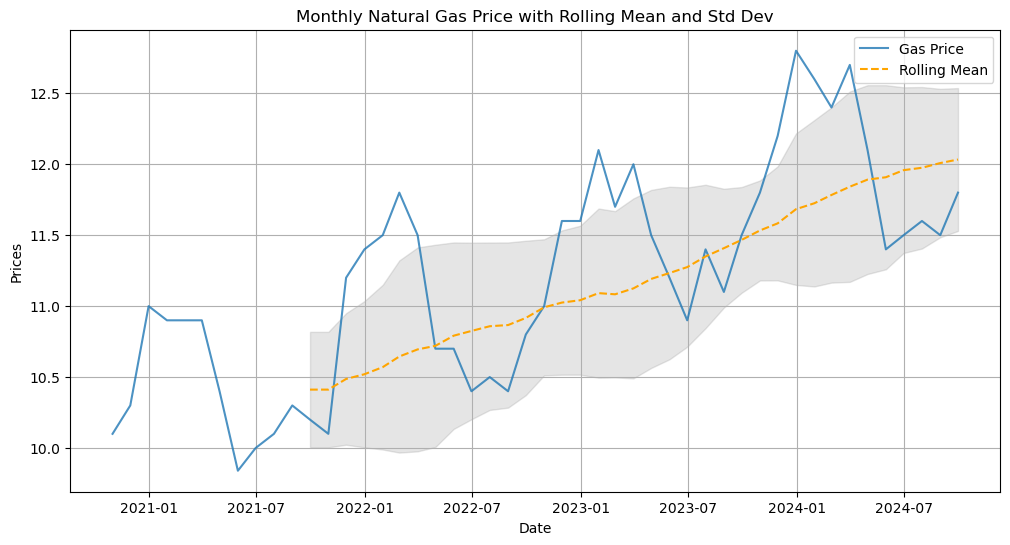

In [6]:
plt.figure(figsize=(12, 6))
plt.plot(data['Prices'], label='Gas Price', alpha=0.8)
plt.plot(data['Prices'].rolling(window=12).mean(), label='Rolling Mean', color='orange', linestyle='--')
plt.fill_between(data.index, data['Prices'].rolling(window=12).mean() - data['Prices'].rolling(window=12).std(),
                 data['Prices'].rolling(window=12).mean() + data['Prices'].rolling(window=12).std(), color='gray', alpha=0.2)
plt.xlabel('Date')
plt.ylabel('Prices')
plt.title('Monthly Natural Gas Price with Rolling Mean and Std Dev')
plt.legend()
plt.grid(True)
plt.show()

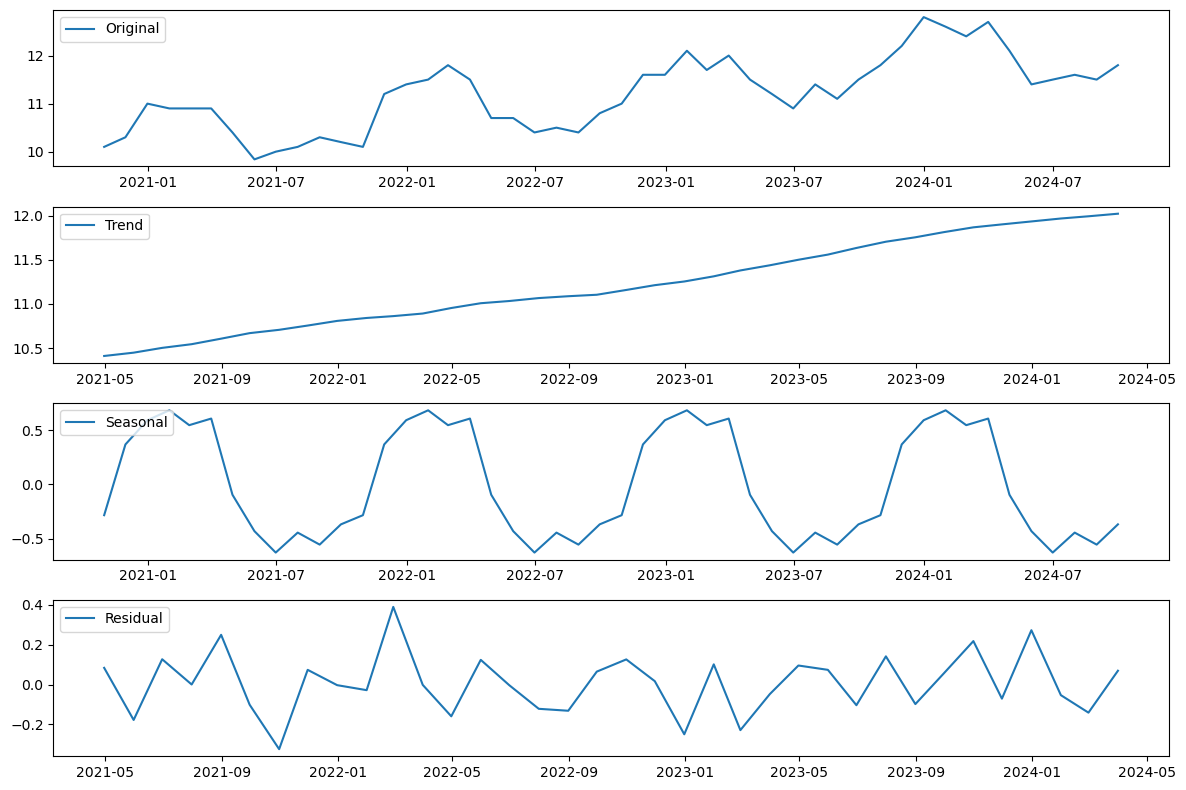

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(data['Prices'], model='additive', period=12)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
plt.plot(data['Prices'], label='Original')
plt.legend(loc='upper left')
plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.subplot(4, 1, 4)
plt.plot(residual, label='Residual')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

C:\Users\GLORY COMPUTERS\AppData\Local\Temp\ipykernel_12968\3340794490.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  date_time = pd.to_datetime(date_time)
C:\Users\GLORY COMPUTERS\AppData\Local\Temp\ipykernel_12968\3340794490.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(r'C:\Users\GLORY COMPUTERS\Downloads\gasprices.csv', parse_dates=['Date'])


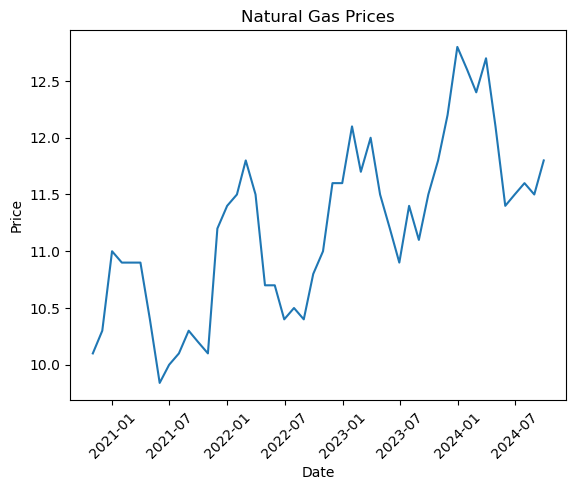

In [9]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import date, timedelta
date_time = ["10-2020", "11-2020", "12-2020"]
date_time = pd.to_datetime(date_time)
data = [1, 2, 3]

df = pd.read_csv(r'C:\Users\GLORY COMPUTERS\Downloads\gasprices.csv', parse_dates=['Date'])
prices = df['Prices'].values
dates = df['Date'].values

fig, ax = plt.subplots()
ax.plot_date(dates, prices, '-')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_title('Natural Gas Prices')
ax.tick_params(axis='x', rotation=45)

plt.show()

In [10]:
start_date = date(2020,10,31)
end_date = date(2024,9,30)
months = []
year = start_date.year
month = start_date.month + 1
while True:
    current = date(year, month, 1) + timedelta(days=-1)
    months.append(current)
    if current.month == end_date.month and current.year == end_date.year:
        break
    else:
        month = ((month + 1) % 12) or 12
        if month == 1:
            year += 1
        
days_from_start = [(day - start_date ).days for day in months]

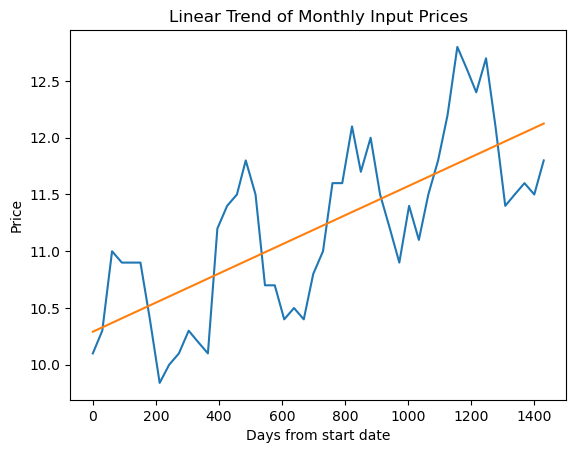

0.001282373598760221 10.29104112595228


In [11]:
def simple_regression(x, y):
    xbar = np.mean(x)
    ybar = np.mean(y)
    slope = np.sum((x - xbar) * (y - ybar))/ np.sum((x - xbar)**2)
    intercept = ybar - slope*xbar
    return slope, intercept

time = np.array(days_from_start)
slope, intercept = simple_regression(time, prices)

# Plot linear trend
plt.plot(time, prices)
plt.plot(time, time * slope + intercept)
plt.xlabel('Days from start date')
plt.ylabel('Price')
plt.title('Linear Trend of Monthly Input Prices')
plt.show()
print(slope, intercept)

Text(0.5, 1.0, 'Smoothed Estimate of Monthly Input Prices')

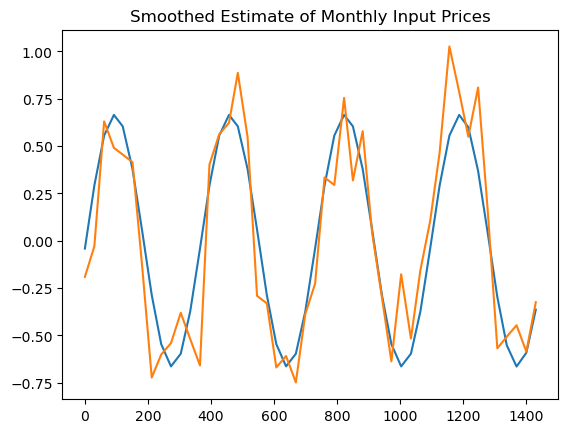

In [12]:
sin_prices = prices - (time * slope + intercept)
sin_time = np.sin(time * 2 * np.pi / (365))
cos_time = np.cos(time * 2 * np.pi / (365))

def bilinear_regression(y, x1, x2):
   
    slope1 = np.sum(y * x1) / np.sum(x1 ** 2)
    slope2 = np.sum(y * x2) / np.sum(x2 ** 2)
    return(slope1, slope2)

slope1, slope2 = bilinear_regression(sin_prices, sin_time, cos_time)


amplitude = np.sqrt(slope1 ** 2 + slope2 ** 2)
shift = np.arctan2(slope2, slope1)


plt.plot(time, amplitude * np.sin(time * 2 * np.pi / 365 + shift))
plt.plot(time, sin_prices)
plt.title('Smoothed Estimate of Monthly Input Prices')

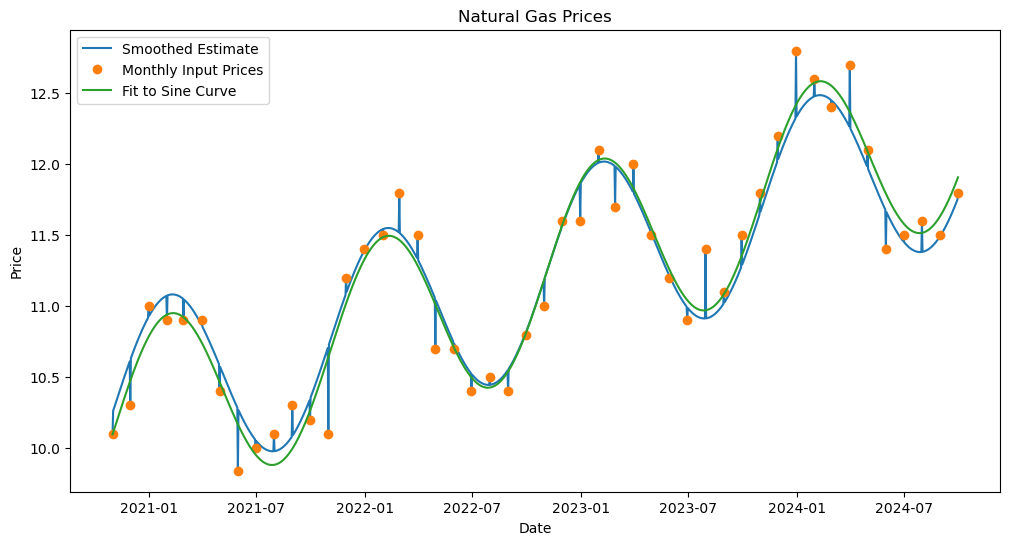

In [16]:
def interpolate(date):
    days = (date - pd.Timestamp(start_date)).days
    if days in days_from_start:
        return prices[days_from_start.index(days)]
    else:
        return amplitude * np.sin(days * 2 * np.pi / 365 + shift) + days * slope + intercept

continuous_dates = pd.date_range(start=pd.Timestamp(start_date), end=pd.Timestamp(end_date), freq='D')

# Set figure size to make the graph wider
plt.figure(figsize=(12, 6))  # Adjust width (12) and height (6) as needed

plt.plot(continuous_dates, [interpolate(date) for date in continuous_dates], label='Smoothed Estimate')

x = np.array(days_from_start)
y = np.array(prices)
fit_amplitude = np.sqrt(slope1 ** 2 + slope2 ** 2)
fit_shift = np.arctan2(slope2, slope1)
fit_slope, fit_intercept = simple_regression(x, y - fit_amplitude * np.sin(x * 2 * np.pi / 365 + fit_shift))
plt.plot(dates, y, 'o', label='Monthly Input Prices')
plt.plot(continuous_dates, fit_amplitude * np.sin((continuous_dates - pd.Timestamp(start_date)).days * 2 * np.pi / 365 + fit_shift) + (continuous_dates - pd.Timestamp(start_date)).days * fit_slope + fit_intercept, label='Fit to Sine Curve')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Natural Gas Prices')
plt.legend()

plt.show()